# LOAN DEFAULT PREDICTION 

# Import

In [4]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize']= (15, 10)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
#import xgboost as xgb
from xgboost import XGBClassifier
import joblib

In [5]:
#import data 
df = pd.read_csv("credit_risk_dataset.csv")
print(df.shape)
df.head()

(32581, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# Pre Processing

In [6]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
# check missing values
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
#fill the missing values
impute = SimpleImputer() #instantiate the imputer
#fit the impute
df[['person_emp_length', 'loan_int_rate']] = impute.fit_transform(df[['person_emp_length', 'loan_int_rate']])
#check missing values
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# Exploratory Data Analysis

In [9]:
#descriptive statistics
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.085333,6322.086646,3.081605,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.011695,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


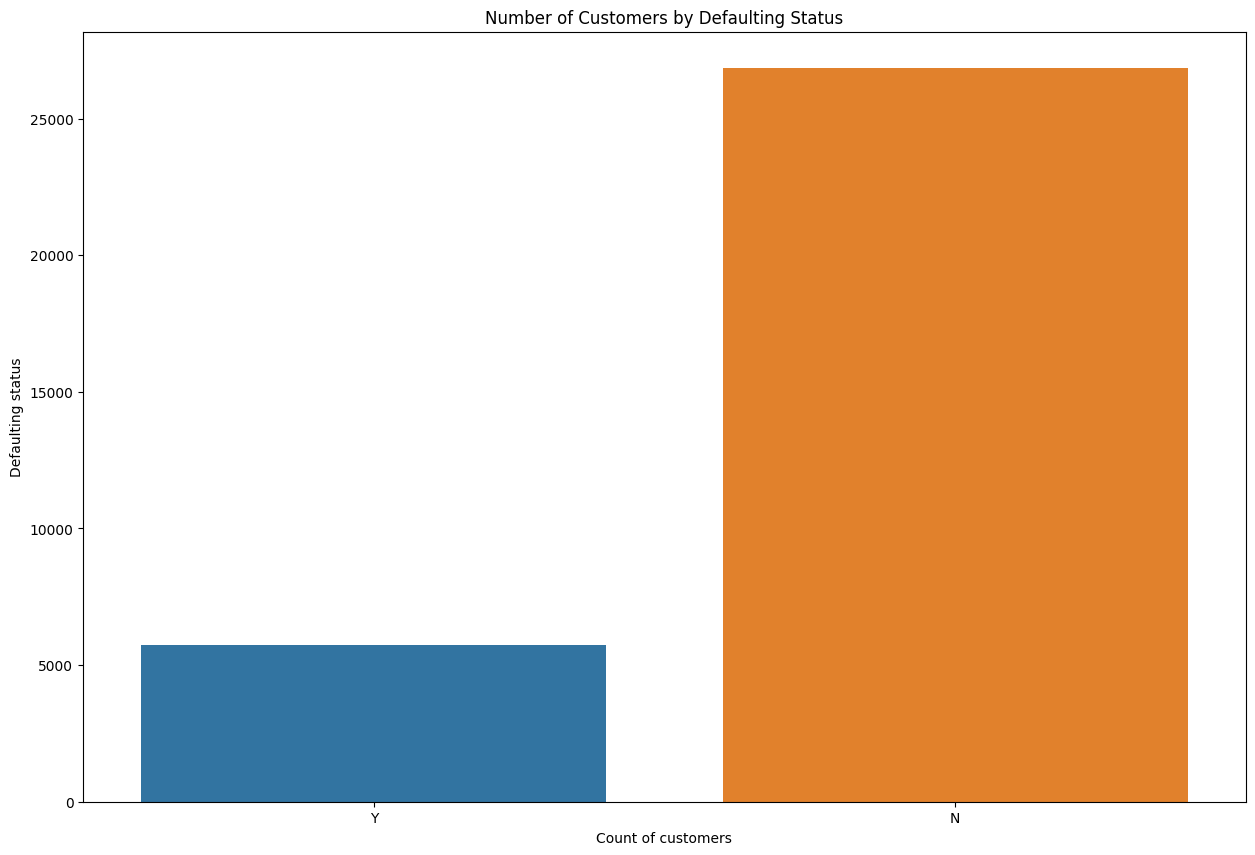

In [10]:
#default distribution
sns.countplot(data = df, x = 'cb_person_default_on_file', hue = 'cb_person_default_on_file')
plt.xlabel('Count of customers')
plt.ylabel('Defaulting status')
plt.title('Number of Customers by Defaulting Status');

In [11]:
#checking the maximum value
df['person_income'].max()

np.int64(6000000)

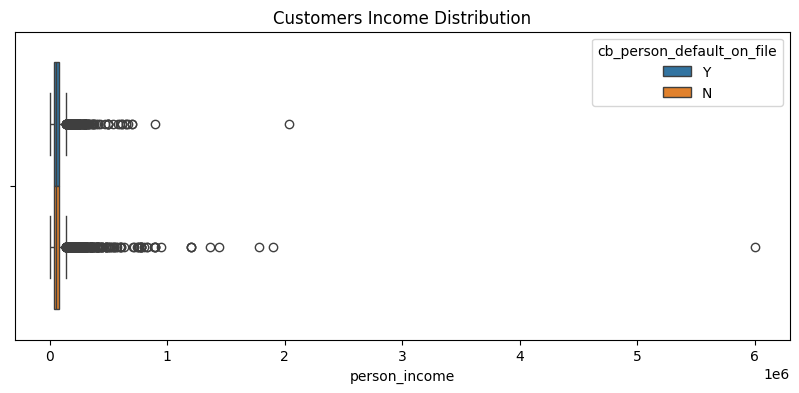

In [12]:
#income distribution
plt.figure(figsize= (10, 4))
sns.boxplot(data = df, x = 'person_income', hue = 'cb_person_default_on_file')
plt.title('Customers Income Distribution');


In [13]:
#checking the outliers
outliers = df[df['person_income'] > 150000 ]
outliers.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15,23,500000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,30000,10.65,0,0.06,N,3
20,25,162500,RENT,2.0,VENTURE,A,35000,7.49,0,0.22,N,4
33,25,306000,RENT,2.0,DEBTCONSOLIDATION,C,24250,13.85,0,0.08,N,3
34,26,300000,MORTGAGE,10.0,MEDICAL,C,7800,13.49,0,0.03,N,4
42,26,300000,MORTGAGE,10.0,VENTURE,A,20000,7.88,0,0.07,N,4


In [14]:
#removing outliers
df1 = df.drop(outliers.index)
df1.shape

(31444, 12)

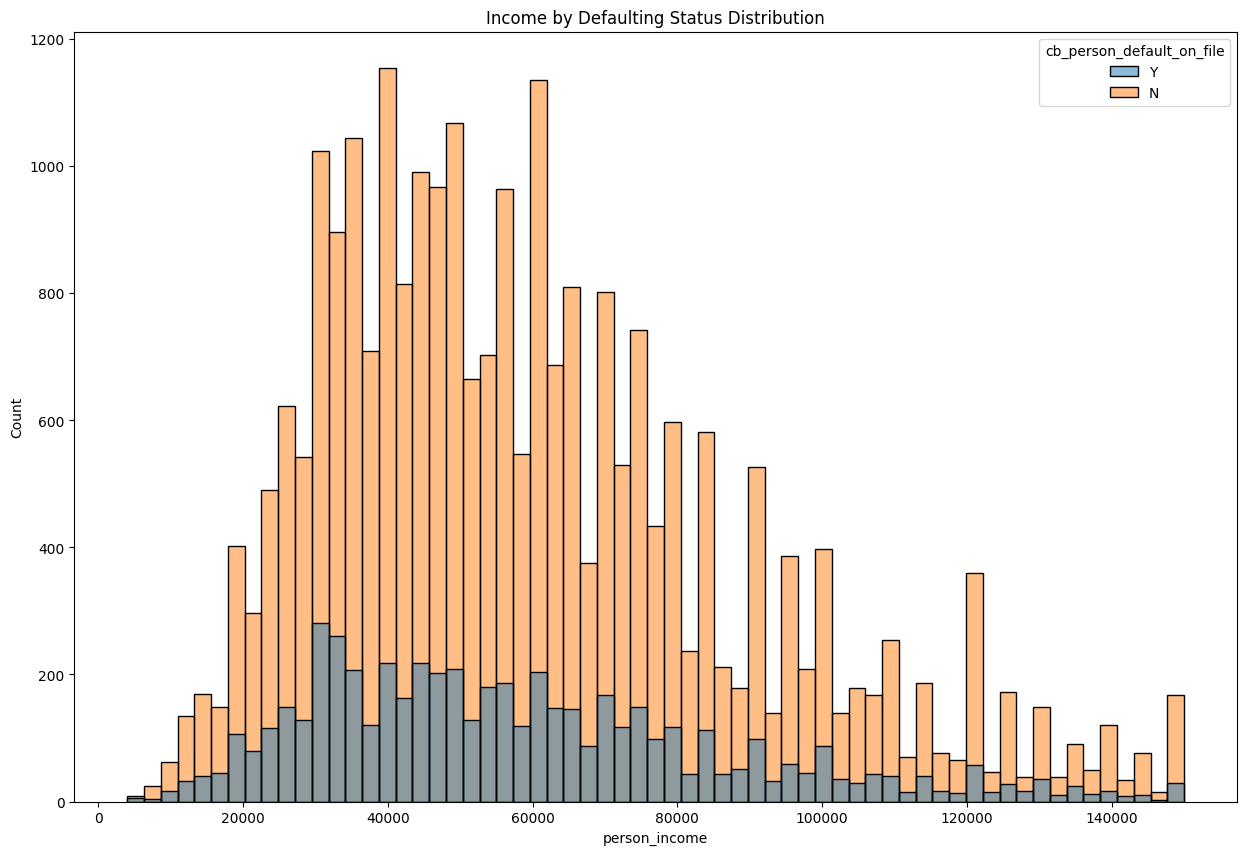

In [15]:
sns.histplot(data = df1, x = 'person_income', hue = 'cb_person_default_on_file')
plt.title('Income by Defaulting Status Distribution');

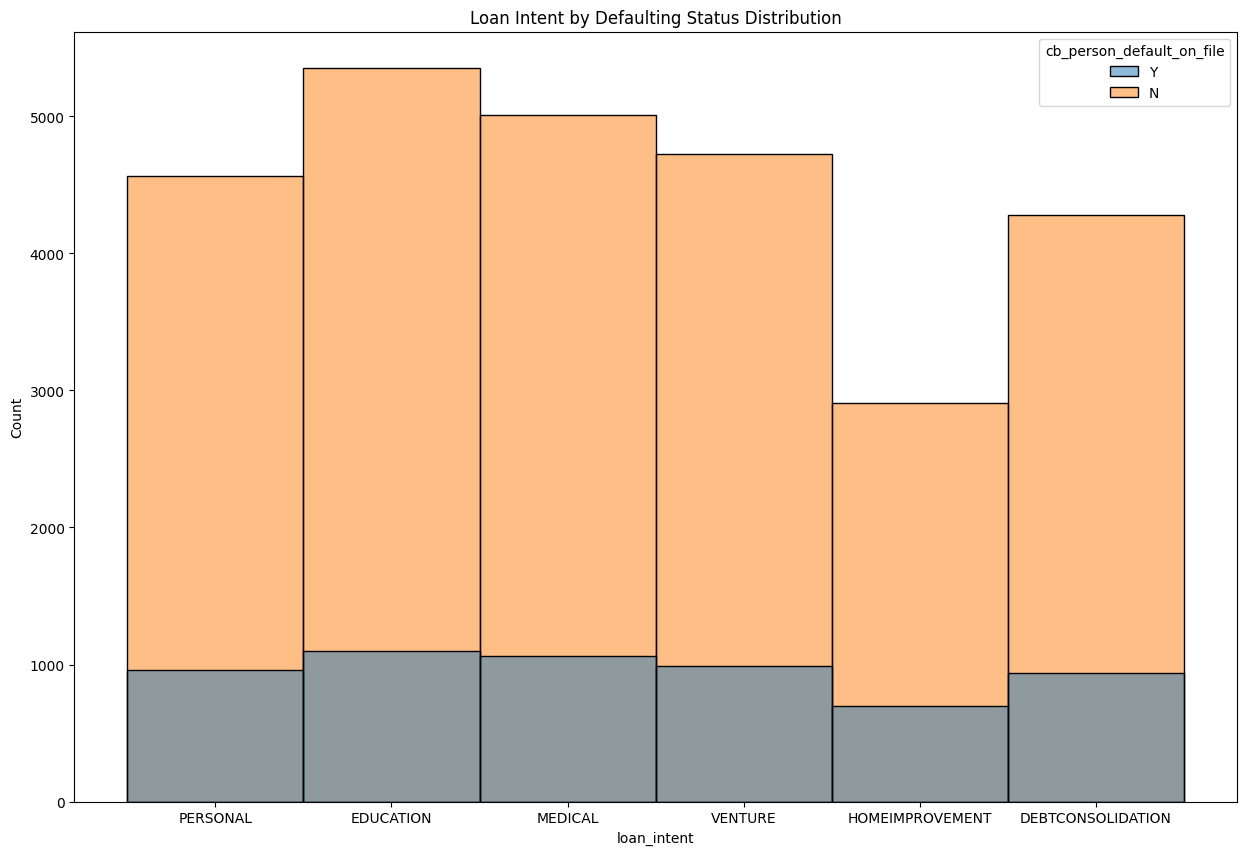

In [16]:
#loan intent distribution
sns.histplot(data = df, x = 'loan_intent', hue = 'cb_person_default_on_file')
plt.title('Loan Intent by Defaulting Status Distribution');

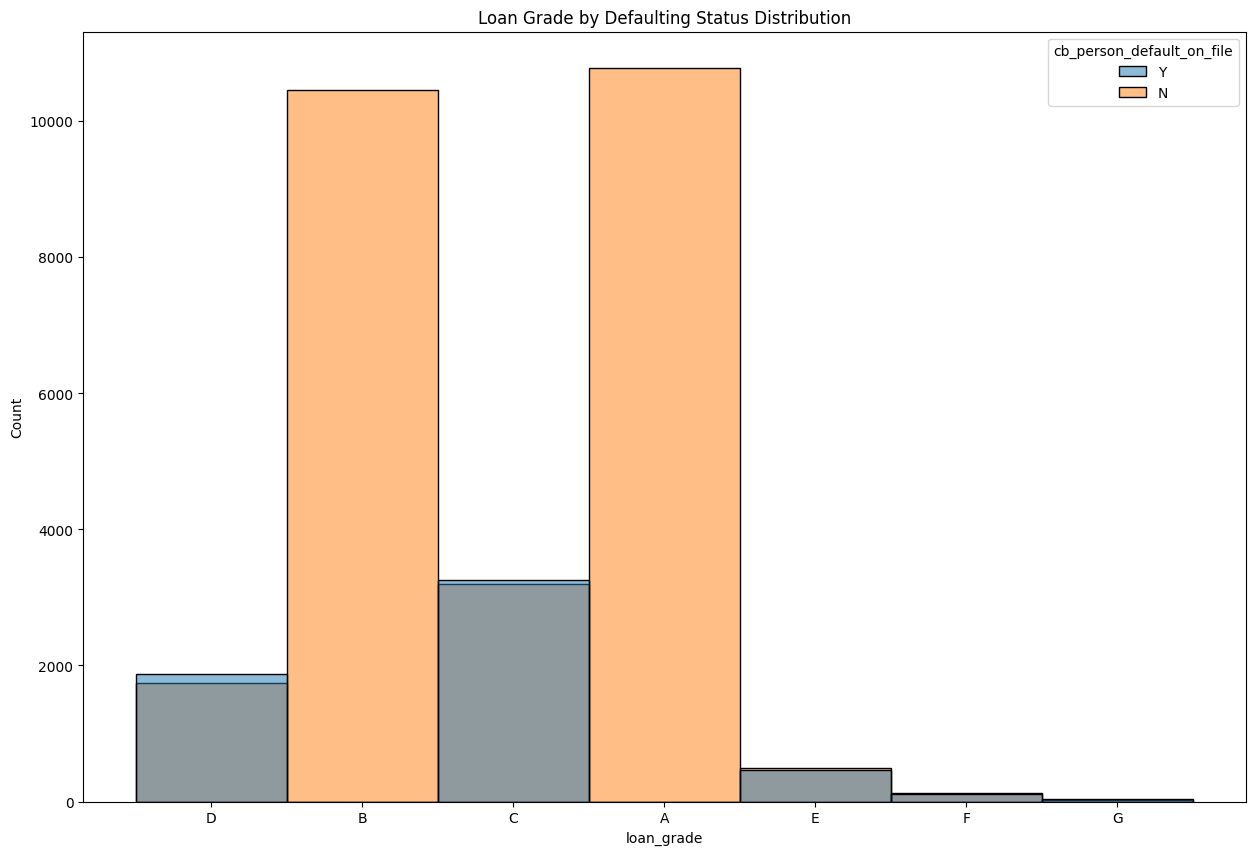

In [17]:
#loan grade distribution
sns.histplot(data = df, x = 'loan_grade', hue = 'cb_person_default_on_file')
plt.title('Loan Grade by Defaulting Status Distribution');

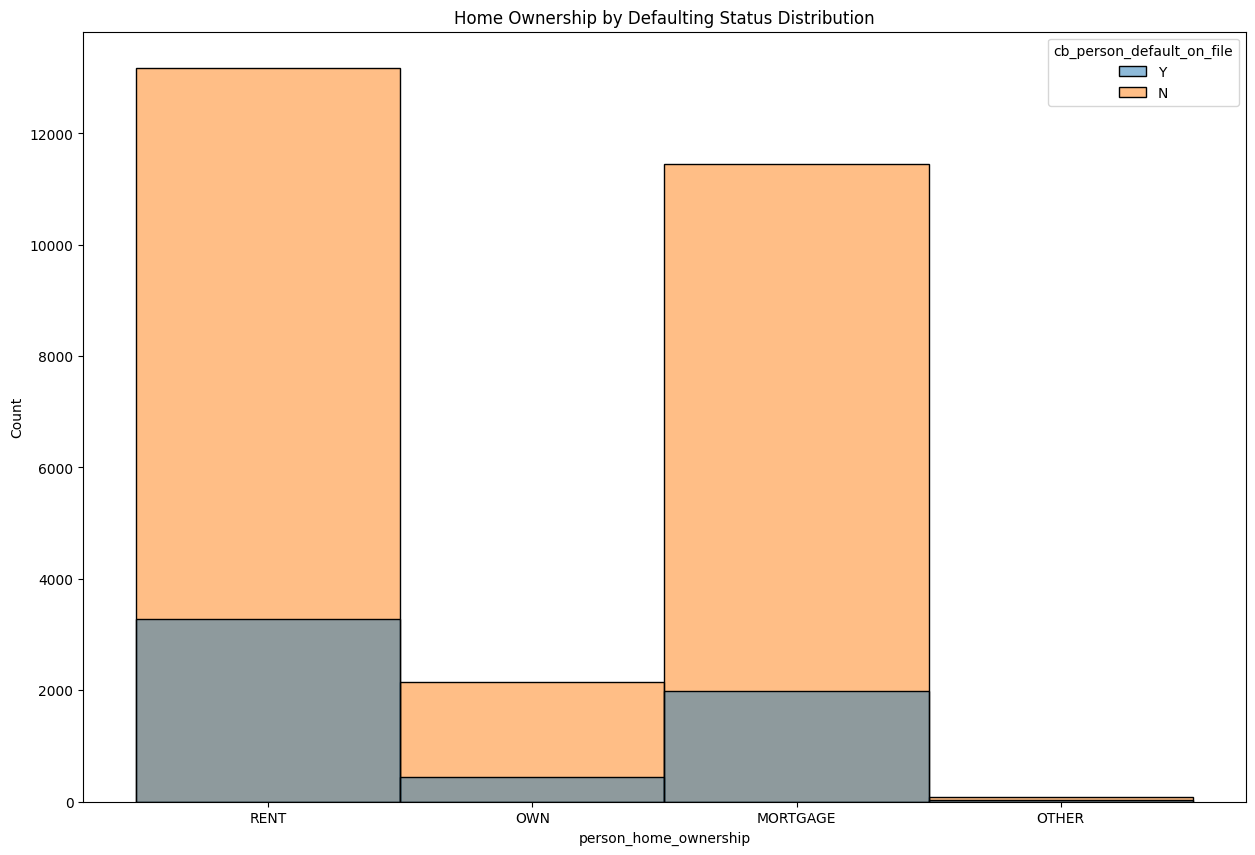

In [18]:
#property ownership ditribution
sns.histplot(data = df, x = 'person_home_ownership', hue = 'cb_person_default_on_file')
plt.title('Home Ownership by Defaulting Status Distribution');

<Axes: >

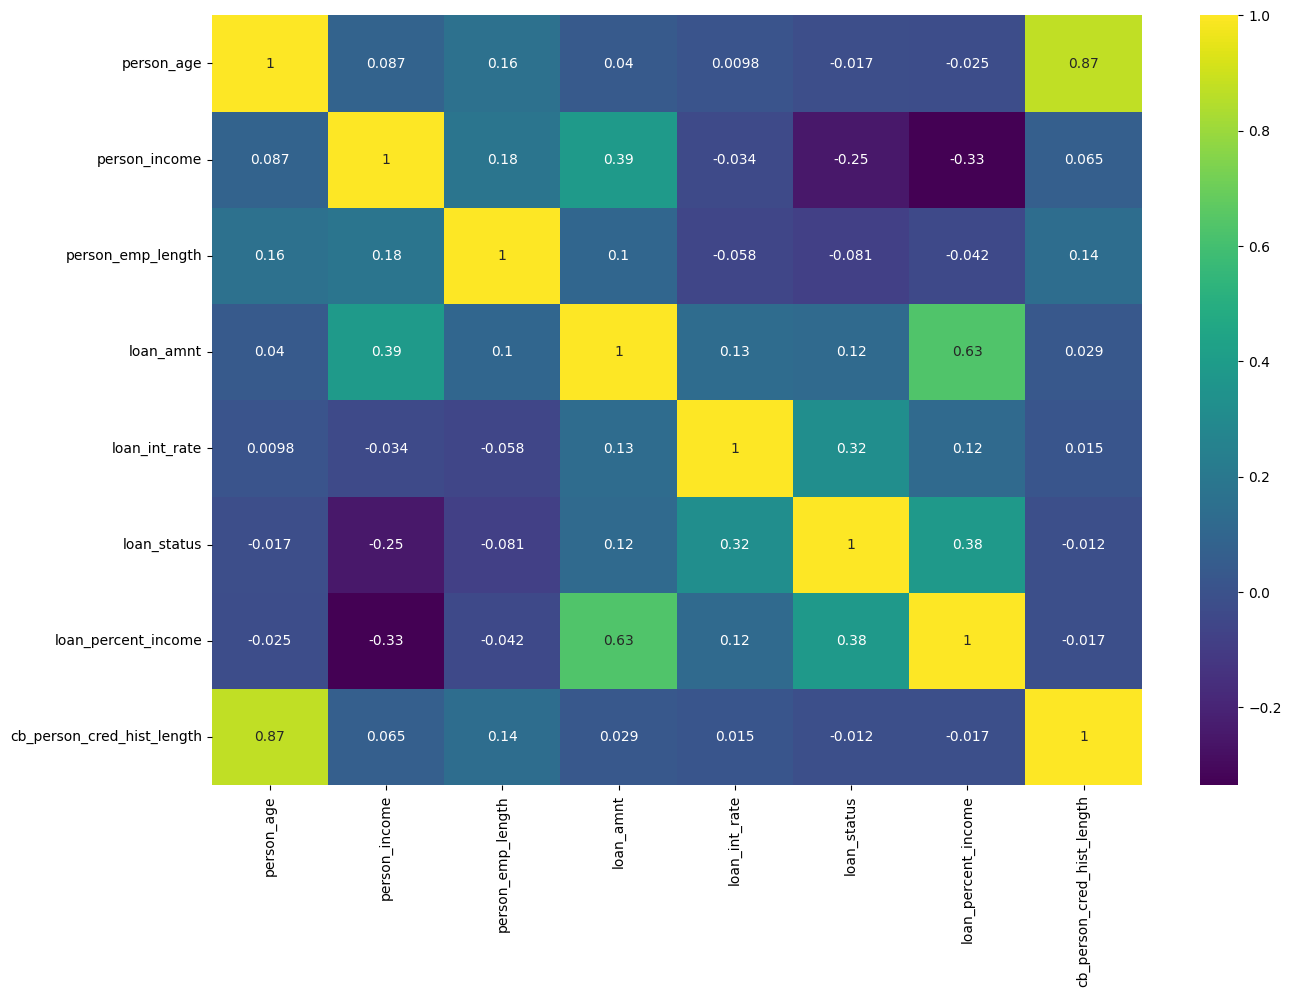

In [19]:
#corelation
corr = df1.select_dtypes(include = 'number').corr()
#heatmap
sns.heatmap(data = corr, annot = True, cmap = 'viridis')

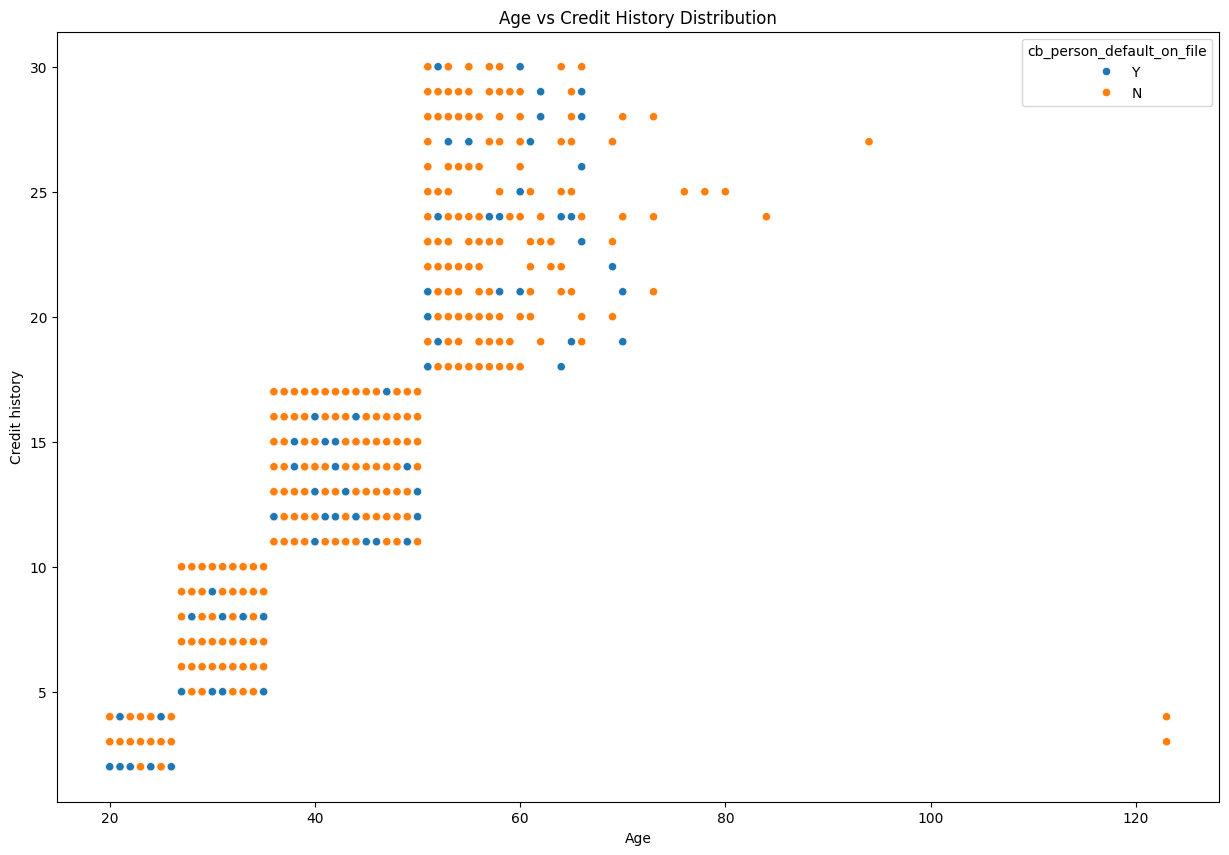

In [20]:
#checking age and credit history
sns.scatterplot(data = df1, x = 'person_age', y = 'cb_person_cred_hist_length', hue  = 'cb_person_default_on_file')
plt.xlabel('Age')
plt.ylabel('Credit history')
plt.title('Age vs Credit History Distribution');

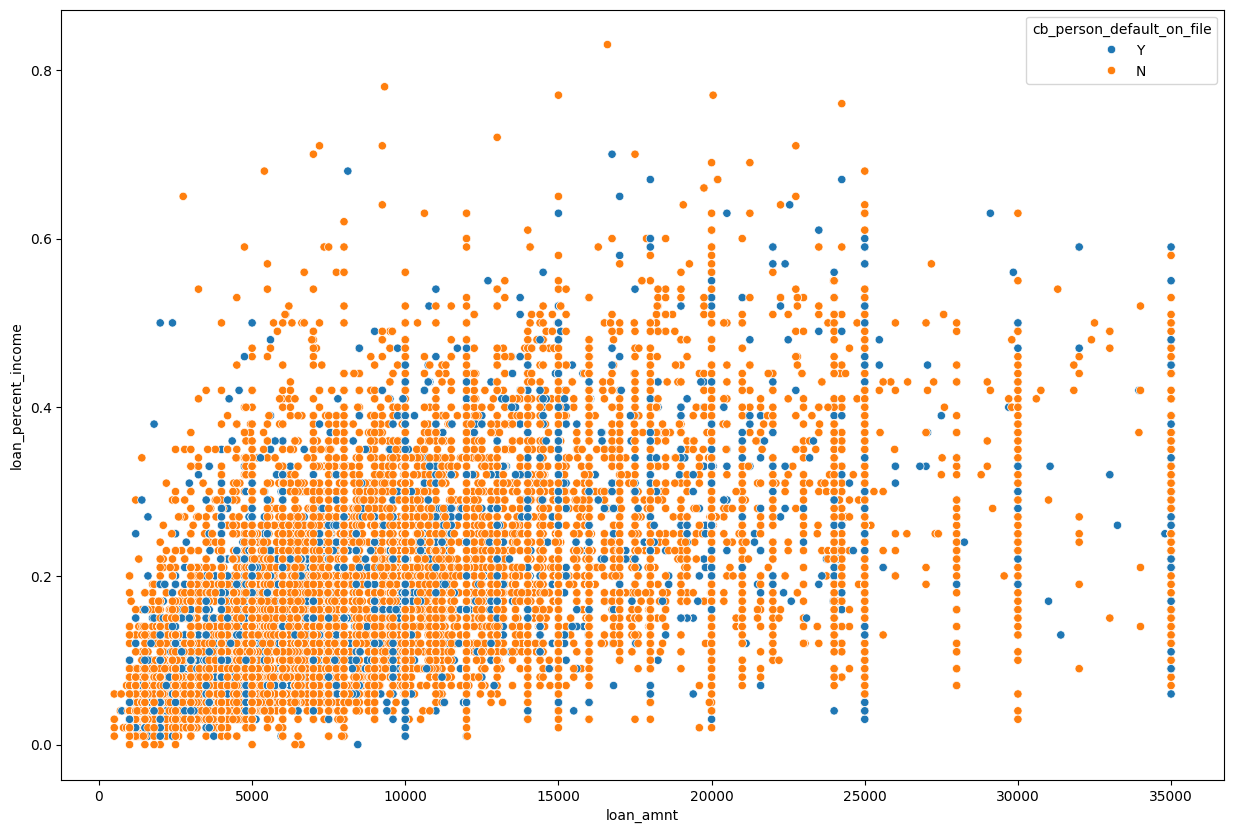

In [21]:
#loan amount vs income percent
sns.scatterplot(data = df, x = 'loan_amnt', y = 'loan_percent_income', hue = 'cb_person_default_on_file');

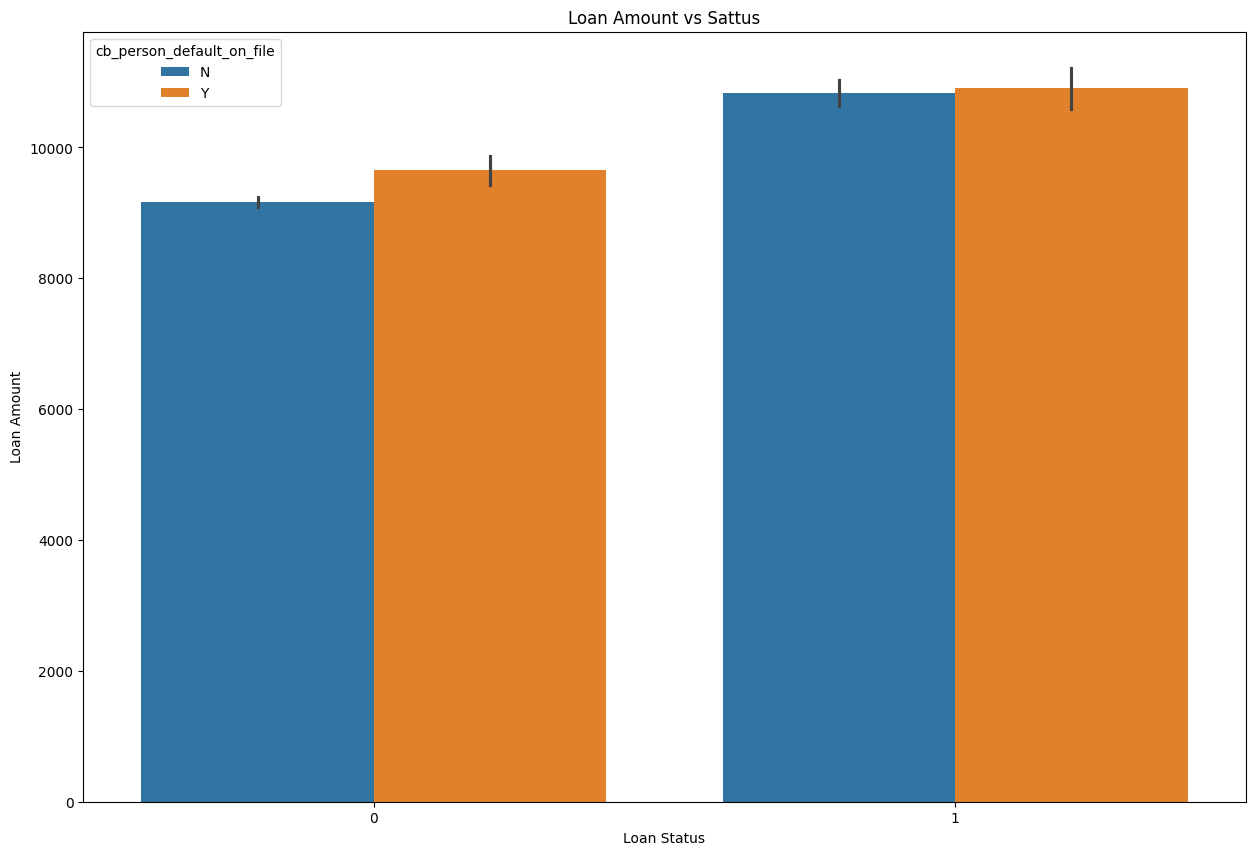

In [22]:
#loan amount by status
sns.barplot(data = df, x = 'loan_status', y = 'loan_amnt', hue = 'cb_person_default_on_file')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs Sattus');

# Modeling

In [23]:
#label encoding
label = LabelEncoder() #instantiate the label encoder
# fit the label
df1['cb_person_default_on_file'] = label.fit_transform(df1['cb_person_default_on_file'])

#check output
df1['cb_person_default_on_file'].head()



0    1
1    0
2    0
3    0
4    1
Name: cb_person_default_on_file, dtype: int64

In [24]:
#one hot encoding
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False, ).set_output(transform = 'pandas') #instatiate the onehotencoder
#columns to be encoded
col = df1[['person_home_ownership', 'loan_intent', 'loan_grade']]
#fit the ohe
encoded = ohe.fit_transform(col)
#check output
encoded.head()

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
#concat the dfs
df2 = pd.concat([df1, encoded], axis = 1).drop(columns = ['person_home_ownership', 'loan_intent', 'loan_grade'])
#display all columns
pd.set_option('display.max_columns', None)
#check output
df2.head()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,22,59000,123.0,35000,16.02,1,0.59,1,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,21,9600,5.0,1000,11.14,0,0.10,0,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,25,9600,1.0,5500,12.87,1,0.57,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,23,65500,4.0,35000,15.23,1,0.53,0,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,24,54400,8.0,35000,14.27,1,0.55,1,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [26]:
#standardize numerical values
scaler = StandardScaler() # instantiate the standardizer
#fit the scaler
(df2[['person_age'
      , 'person_income'
      , 'person_emp_length'
      , 'loan_amnt'
      , 'loan_int_rate'
      , 'loan_percent_income'
      ,'cb_person_cred_hist_length']]) = scaler.fit_transform(df2[['person_age'
                                                    , 'person_income'
                                                    , 'person_emp_length'
                                                    , 'loan_amnt'
                                                    , 'loan_int_rate'
                                                    , 'loan_percent_income'
                                                    , 'cb_person_cred_hist_length']])

#check output 
df2.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,-0.905774,-0.023585,29.748888,4.217559,1.632166,1,3.896592,1,-0.682327,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.066925,-1.733715,0.069135,-1.372176,0.046704,0,-0.687419,0,-0.931321,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.422319,-1.733715,-0.936958,-0.632358,0.608763,1,3.709489,0,-0.682327,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.744622,0.201433,-0.182388,4.217559,1.375503,1,3.335284,0,-0.931321,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.583470,-0.182828,0.823705,4.217559,1.063609,1,3.522387,1,-0.433333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Split Data and Train Models

In [27]:
#target and features
target = 'cb_person_default_on_file'
features = df2.drop(columns = [target])
X = features
y = df2[target]

In [28]:
#split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)
print('X_train is', X_train.shape)
print('X_test is', X_test.shape)
print('y_train is', y_train.shape)
print('y_test is', y_test.shape)

X_train is (25155, 25)
X_test is (6289, 25)
y_train is (25155,)
y_test is (6289,)


### Logistic Regression

In [29]:
#instantiate logistic regression
reg = LogisticRegression(random_state = 42)
#train the algorithm
reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [30]:
# predict on training data
y_train_pred = reg.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
# predict on test data
y_test_pred = reg.predict(X_test)
y_test_pred

array([1, 1, 0, ..., 1, 1, 0])

### Evaluate

In [32]:
#accuracy score
accuracy = accuracy_score(y_test, y_test_pred)
accuracy

0.8250914294800445

### Extreme Gradient Boost 

In [33]:
#instantiate xgbclassifier
xgb = XGBClassifier()
#fit xgb on training data
xgb.fit(X_train, y_train)
#fixing imbalance
xgb_imb= XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
xgb_imb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [34]:
#predict on training data
y_train_pred = xgb_imb.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
#predict on training data
y_test_xgb = xgb_imb.predict(X_test)
y_test_xgb

array([1, 1, 0, ..., 1, 1, 0])

### Evaluate

In [36]:
#accuracy score
accuracy_report = classification_report(y_test, y_test_xgb)
print(accuracy_report)

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      5212
           1       0.50      0.93      0.65      1077

    accuracy                           0.83      6289
   macro avg       0.74      0.87      0.77      6289
weighted avg       0.90      0.83      0.84      6289



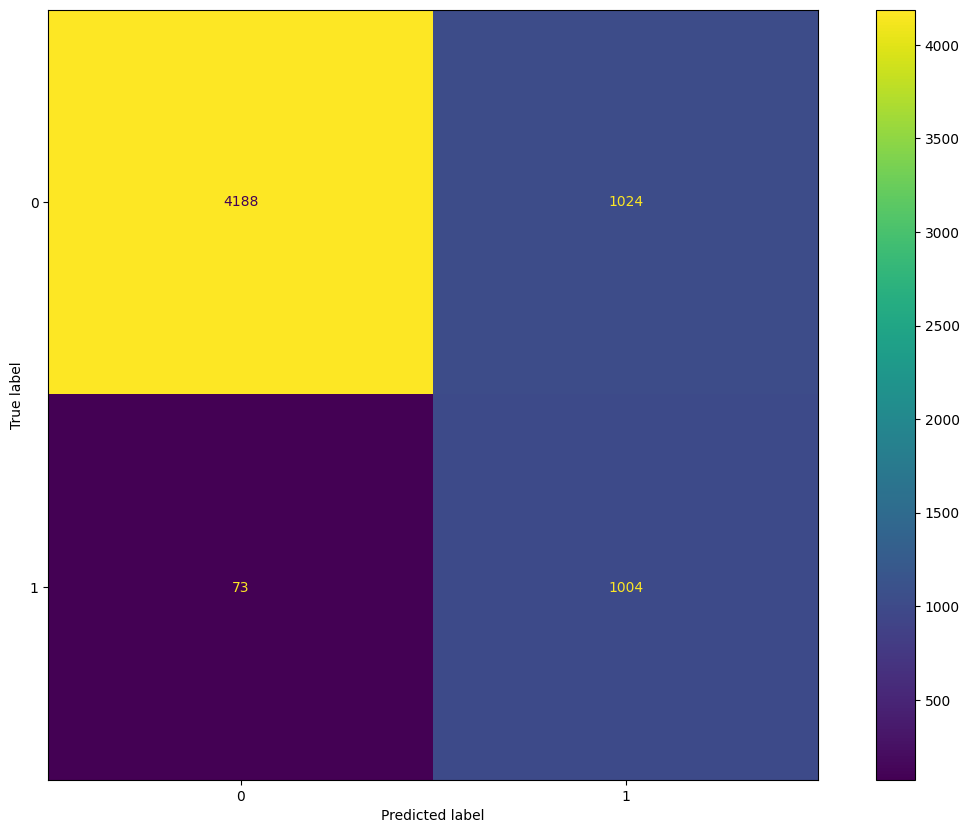

In [37]:
#confusion matrix
con_matrix = confusion_matrix(y_test, y_test_xgb)
#Display the matrix
fig = ConfusionMatrixDisplay(con_matrix, display_labels = None)
fig.plot()
plt.show()

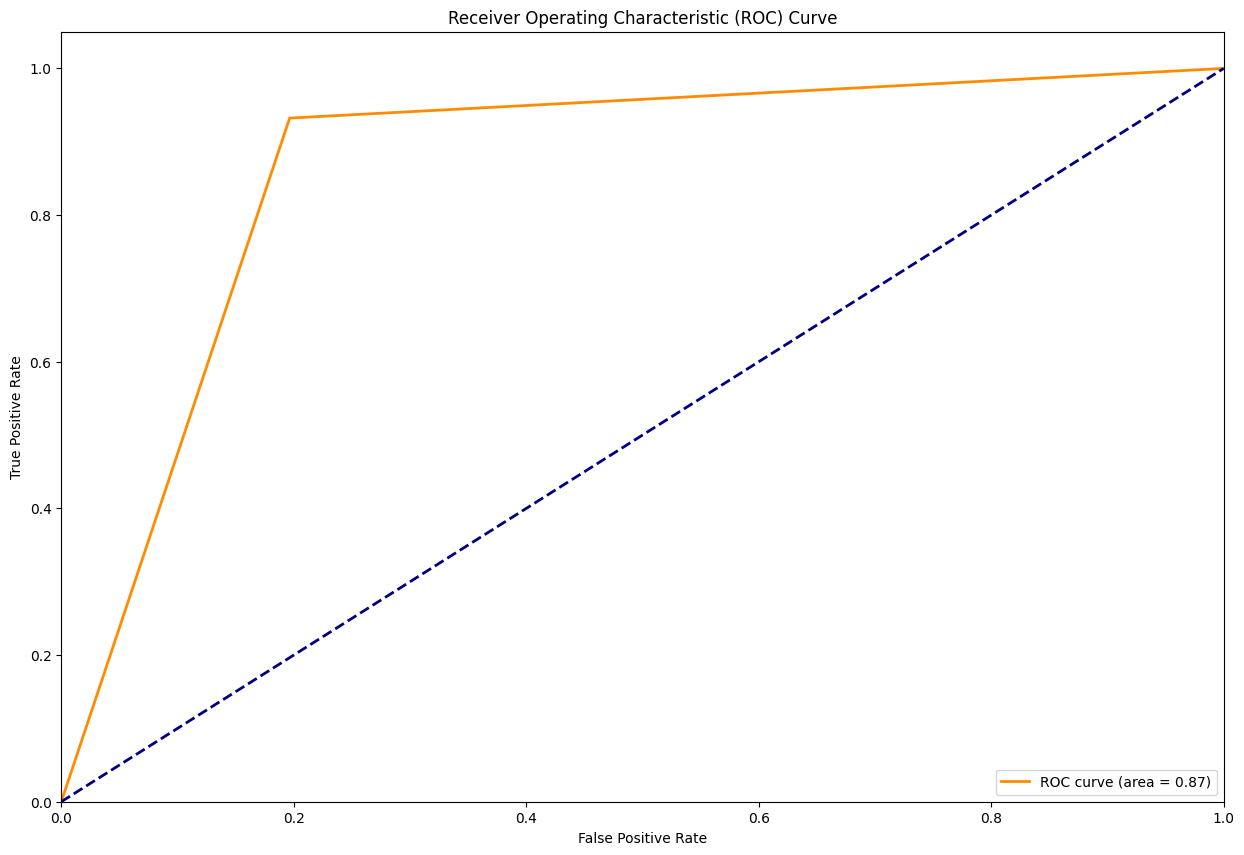

In [38]:
#using ROC- auc
from sklearn.metrics import roc_curve, auc
#istantiating roc_curve and auc
fpr, tpr, thresholds = roc_curve(y_test, y_test_xgb)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Hyper Parameter Tuning

In [39]:
#using GridSearchCV
params = {'learning_rate': [0.1, 0.01 ],
          'n_estimators': [100, 200, 300, 400 , 500],
         'max_depth' : [1, 2 , 3 , 4 , None]}
#grid search
grid_search = GridSearchCV(estimator = xgb_imb, param_grid = params, cv = 5, scoring = 'accuracy')

#fit grid search
grid_search.fit(X_train, y_train)

#outcome
print(grid_search.best_params_)
print(grid_search.best_score_)


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 400}
0.829179089644206


In [40]:
y_pred = grid_search.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      5212
           1       0.49      0.99      0.66      1077

    accuracy                           0.82      6289
   macro avg       0.75      0.89      0.77      6289
weighted avg       0.91      0.82      0.84      6289



### Simple Vector Machine

In [42]:
#instantiate svc
vector = SVC()
# fit the model
vector.fit(X_train, y_train)

SVC()

In [43]:
#predict on training data
y_train_vector = vector.predict(X_train)
y_train_vector

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
#predict on training data
y_test_vector = vector.predict(X_test)
y_test_vector

array([1, 1, 0, ..., 0, 1, 0])

### Evaluate

In [45]:
vector_accuracy = accuracy_score(y_test, y_test_vector)
vector_accuracy

0.8314517411353156

# Feature Selection

In [46]:
#feature importances using XGBClassifier
feat_imp = xgb_imb.feature_importances_
feat_imp

array([0.00440881, 0.00480555, 0.00450724, 0.00479259, 0.10381432,
       0.00408436, 0.00468231, 0.0046661 , 0.00497396, 0.00153473,
       0.0045027 , 0.00564336, 0.00471202, 0.00430888, 0.00653742,
       0.00389185, 0.00482555, 0.0036076 , 0.0238908 , 0.22100128,
       0.33847076, 0.13256843, 0.06023992, 0.03189417, 0.01163535],
      dtype=float32)

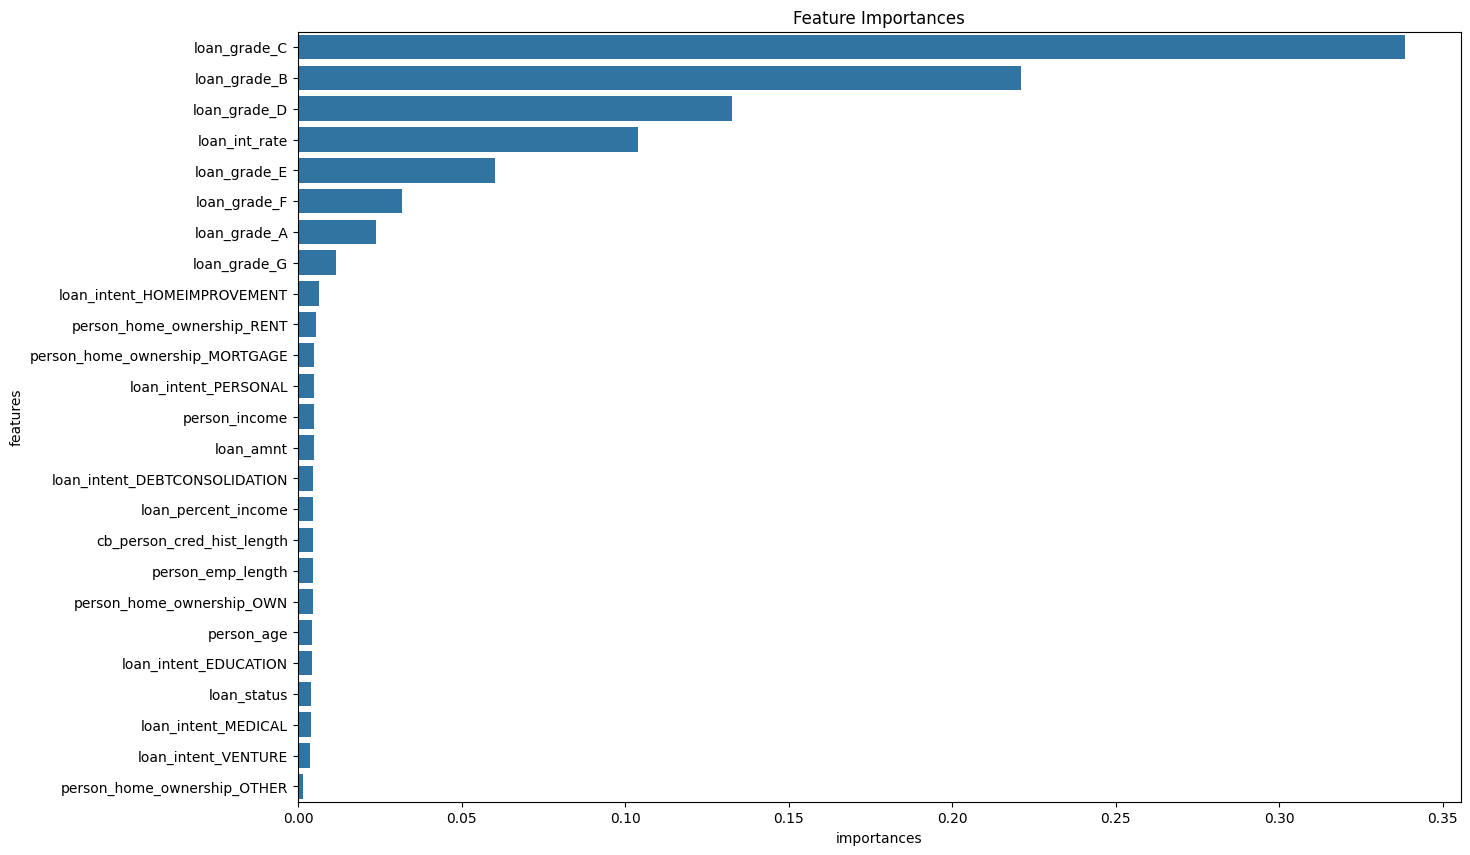

In [47]:
#create a dataframe
feature_importances = pd.DataFrame({'features': X_train.columns, 'importances' :feat_imp}).sort_values(by = 'importances', ascending = False )

print()
sns.barplot(data =feature_importances,  x = 'importances', y = 'features' )
plt.title('Feature Importances');

In [48]:

print(feature_importances)

                          features  importances
20                    loan_grade_C     0.338471
19                    loan_grade_B     0.221001
21                    loan_grade_D     0.132568
4                    loan_int_rate     0.103814
22                    loan_grade_E     0.060240
23                    loan_grade_F     0.031894
18                    loan_grade_A     0.023891
24                    loan_grade_G     0.011635
14     loan_intent_HOMEIMPROVEMENT     0.006537
11      person_home_ownership_RENT     0.005643
8   person_home_ownership_MORTGAGE     0.004974
16            loan_intent_PERSONAL     0.004826
1                    person_income     0.004806
3                        loan_amnt     0.004793
12   loan_intent_DEBTCONSOLIDATION     0.004712
6              loan_percent_income     0.004682
7       cb_person_cred_hist_length     0.004666
2                person_emp_length     0.004507
10       person_home_ownership_OWN     0.004503
0                       person_age     0

In [49]:
#save the model
joblib.dump(xgb_imb, 'Loan_Prediction.pkl')

['Loan_Prediction.pkl']